<a href="https://colab.research.google.com/github/benwys/phyton-kurs/blob/main/project_2_the_law_of_large_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Law of Large numbers: as the number of experimet repetitions increases, the average of the sample means better approximates the population mean.

*   one sample or one experiment is unlikely to provide a good estimate of true population mean
*   sampling many times can provide an accurate measure of the true population mean






### Project

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# simulation pameters

population_size = 2.3e5 #scientific notation

sample_size = 50
number_of_samples = 500

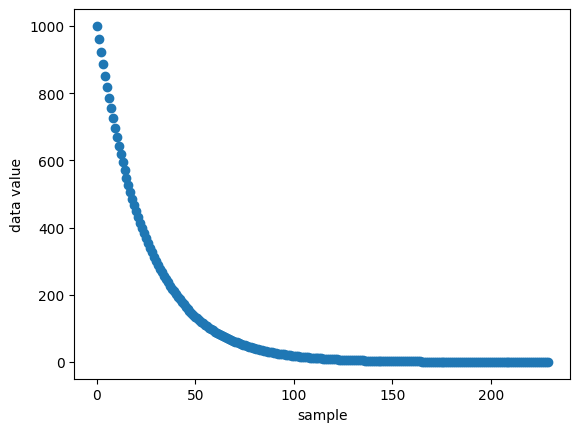

In [16]:
# generate the population of numbers
population = 1 / np.logspace(np.log10(.001),np.log10(10),int(population_size)) #sililar to linspace;  logs used for scalling

#true mean
trueMean = np.mean(population)

skip = int(1e3)
plt.plot(population[::skip], 'o') # ':' from the first data point ':' to the last data point 'skip' skip according to value
plt.xlabel('sample')
plt.ylabel('data value')
plt.show()

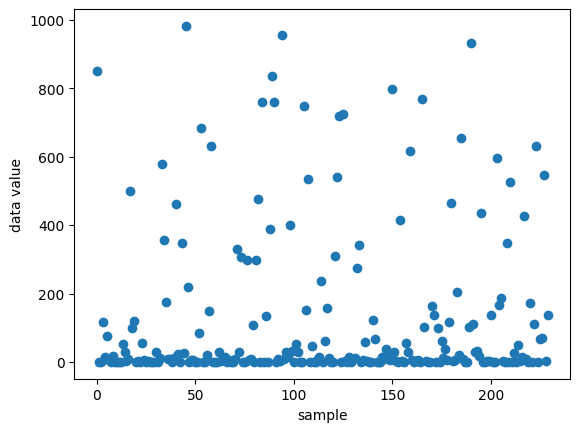

In [17]:
# shuffle the data
np.random.shuffle(population) #modify a sequence in-place; changes the variable

plt.plot(population[::skip], 'o')
plt.xlabel('sample')
plt.ylabel('data value')
plt.show()

In [19]:
# monte carlo sampling
samplemeans = np.zeros(number_of_samples)

for expi in range(number_of_samples):
  randsample = np.random.choice(population, size=sample_size)
  samplemeans[expi] = np.mean(randsample)


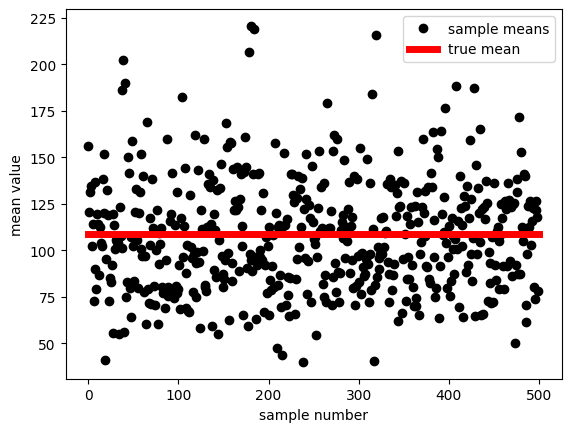

In [23]:
plt.plot(samplemeans, 'ko', label='sample means')
plt.plot([0, number_of_samples], [trueMean,trueMean], 'r', linewidth=5, label='true mean')
plt.legend()
plt.xlabel('sample number')
plt.ylabel('mean value')
plt.show()

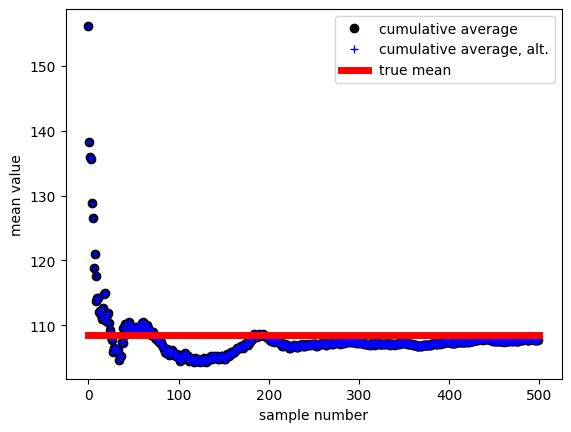

In [31]:
# cumulative average

cumave = np.zeros(number_of_samples)
for i in range(number_of_samples):
  cumave[i] = np.mean(samplemeans[:i+1])

cumave2 = np.cumsum(samplemeans) / np.arange(1, number_of_samples+1)

plt.plot(cumave, 'ko', label='cumulative average')
plt.plot(cumave2,'b+', label='cumulative average, alt.')
plt.plot([0, number_of_samples], [trueMean,trueMean], 'r', linewidth=5, label='true mean')
plt.legend()
plt.xlabel('sample number')
plt.ylabel('mean value')

plt.show( )

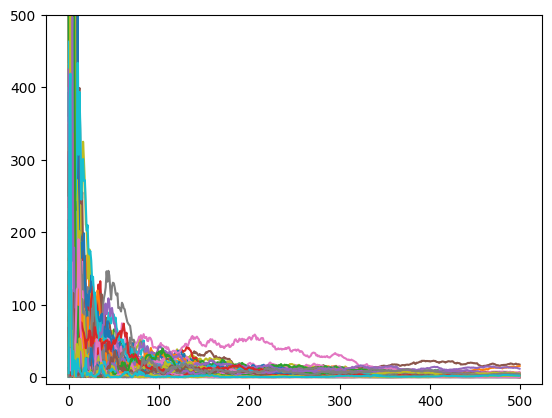

In [42]:
number_of_meta_samples = 100
cumaves = np.zeros((number_of_meta_samples, number_of_samples))
allsamplemeans = np.zeros((number_of_meta_samples, number_of_samples))

for metai in range(number_of_meta_samples):
  for expi in range(number_of_samples):
    randsample = np.random.choice(population, size=sample_size)
    samplemeans[expi] = np.mean(randsample)
  # not we get the cumulative average divergences
  tmp = np.cumsum(samplemeans) / np.arange(1, number_of_samples+1)
  cumaves[metai,:] = (tmp-trueMean)**2

  #store the samplemeans
  allsamplemeans[metai,:] = samplemeans

plt.plot(cumaves.T)
plt.ylim([-10,500])
plt.show()

### Bonus

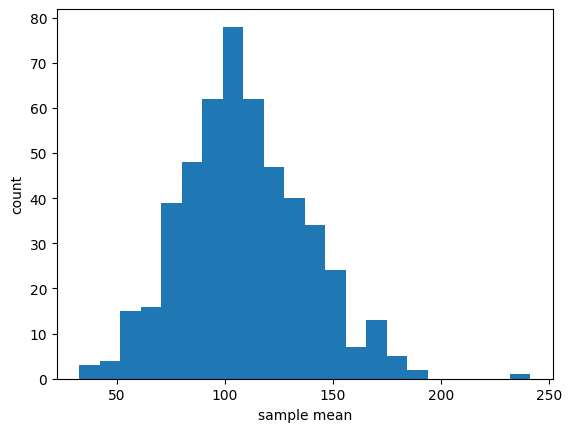

In [39]:
plt.hist(samplemeans, bins='fd') #freedman-diaconis rule
plt.xlabel('sample mean')
plt.ylabel('count')
nbuplt.show()

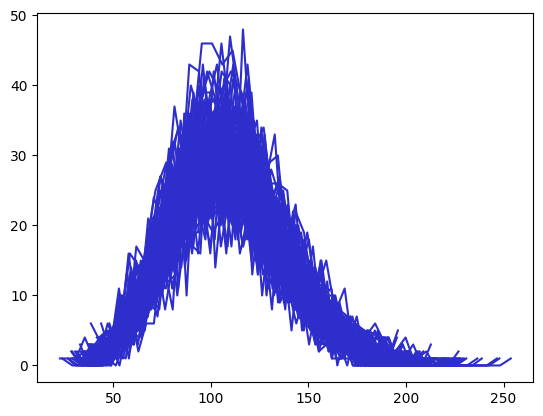

In [48]:
nbins = 40

for i in range(number_of_meta_samples):
  y,x = np.histogram(allsamplemeans[i,:], bins=nbins)
  x = (x[1:]+x[:-1])/2
  plt.plot(x,y,color=[.18,.18,.8])
plt.show()